In [87]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

In [88]:
df = pd.read_csv('Resources/m160-hw-dataset.csv',encoding = 'utf-8')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [89]:
df['Credit Score'].max()

7510.0

In [90]:
df = df[(df['Credit Score'] >= 350) & (df['Credit Score'] <= 850)]
print(len(df))

76295


In [91]:
print(df['Annual Income'].min())
df =df[df['Annual Income'] >= 0]
print(len(df))

76627.0
76295


In [92]:
# Step 2: Calculate the IQR for the 'Annual Income' column
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 852577.5
Q3: 1661626.0
IQR: 809048.5


In [93]:
# Step 3: Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Upper Bound: 2875198.75


In [94]:
df = df[df['Annual Income']<= upper_bound]
print(len(df))

72775


In [95]:
df2 = df.copy()

In [96]:
#Checking the null values
null_value_rows = df2[df2.isnull().any(axis = 1)]
print(f'There are total of {len(null_value_rows)} rows with a null value in the dataset')
df2.isnull().sum()

There are total of 40142 rows with a null value in the dataset

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             3143
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    38535
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      143
Tax Liens                           6
dtype: int64

In [97]:
#Dropping the null values
clean_df = df2.dropna()

#Checking the remaining null values
print(clean_df.isnull().sum())
print('\n')

#Checking the size of the data
print(f'This data now contains {clean_df.shape[0]} rows and {clean_df.shape[1]} columns')

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


This data now contains 32633 rows and 19 columns


In [98]:
print('Finding unique values in each column')
for i in clean_df.columns[:]:
  print("-"*75)
  print("# of unique values of ",i," column :", clean_df[i].nunique())
  print("unique values:")
  print(clean_df[i].unique())

Finding unique values in each column
---------------------------------------------------------------------------
# of unique values of  Loan ID  column : 26092
unique values:
['4eed4e6a-aa2f-4c91-8651-ce984ee8fb26'
 '273581de-85d8-4332-81a5-19b04ce68666'
 '8af915d9-9e91-44a0-b5a2-564a45c12089' ...
 '8506a4e9-af7d-47d2-a1bf-7ea2c41858f0'
 '06eba04f-58fc-424a-b666-ed72aa008900'
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7']
---------------------------------------------------------------------------
# of unique values of  Customer ID  column : 26092
unique values:
['5efb2b2b-bf11-4dfd-a572-3761a2694725'
 '90a75dde-34d5-419c-90dc-1e58b04b3e35'
 'af534dea-d27e-4fd6-9de8-efaa52a78ec0' ...
 'be67200e-1ef1-4b63-86a6-2bf27d3c704d'
 '77f2252a-b7d1-4b07-a746-1202a8304290'
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3']
---------------------------------------------------------------------------
# of unique values of  Loan Status  column : 2
unique values:
['Fully Paid' 'Charged Off']
--------------------------

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72775 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       72775 non-null  object 
 1   Customer ID                   72775 non-null  object 
 2   Loan Status                   72775 non-null  object 
 3   Current Loan Amount           72775 non-null  float64
 4   Term                          72775 non-null  object 
 5   Credit Score                  72775 non-null  float64
 6   Annual Income                 72775 non-null  float64
 7   Years in current job          69632 non-null  object 
 8   Home Ownership                72775 non-null  object 
 9   Purpose                       72775 non-null  object 
 10  Monthly Debt                  72775 non-null  float64
 11  Years of Credit History       72775 non-null  float64
 12  Months since last delinquent  34240 non-null  float64
 13  Number

In [100]:
# Using .loc to ensure we are modifying the DataFrame correctly
clean_df.loc[:, 'Loan Status'] = clean_df['Loan Status'].str.lower().str.strip().replace({
    'fully paid': 'Fully Paid', 
    'charged off': 'Charged Off'
})


In [101]:
clean_df.loc[:, 'Term'] = clean_df['Term'].str.lower().str.strip().replace({
    'short term': 'Short Term', 
    'long term': 'Long Term'
})

In [102]:
# Check the distribution of 'Loan Status'
loan_status_distribution = clean_df['Loan Status'].value_counts()
print("Loan Status Distribution:\n", loan_status_distribution)

Loan Status Distribution:
 Loan Status
Fully Paid     27353
Charged Off     5280
Name: count, dtype: int64


In [103]:
# Check the distribution of 'Term'
term_distribution = clean_df['Term'].value_counts()
print("Term Distribution:\n", term_distribution)

Term Distribution:
 Term
Short Term    23498
Long Term      9135
Name: count, dtype: int64


In [104]:
# Define mapping for Loan Status
loan_status_map = {'Fully Paid': 1, 'Charged Off': 0}

In [105]:
# Define mapping for Term
term_map = {'Short Term': 1, 'Long Term': 0}

In [106]:
# Apply mapping to create new numerical columns using .loc
clean_df.loc[:, 'Loan Status Numerical'] = clean_df['Loan Status'].map(loan_status_map)
clean_df.loc[:, 'Term Numerical'] = clean_df['Term'].map(term_map)


In [107]:
clean_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Numerical,Term Numerical
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,...,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,1
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,...,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,1,1
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,...,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,1,1


In [108]:
print(len(clean_df))

32633


In [109]:
cleaned_data = clean_df.copy()

In [110]:
cleaned_data = clean_df[(clean_df['Current Loan Amount'] <= 1000000)]

In [111]:
cleaned_data.to_csv("Resources/cleaned_m160.csv", encoding='utf-8')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27981 entries, 6 to 99997
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       27981 non-null  object 
 1   Customer ID                   27981 non-null  object 
 2   Loan Status                   27981 non-null  object 
 3   Current Loan Amount           27981 non-null  float64
 4   Term                          27981 non-null  object 
 5   Credit Score                  27981 non-null  float64
 6   Annual Income                 27981 non-null  float64
 7   Years in current job          27981 non-null  object 
 8   Home Ownership                27981 non-null  object 
 9   Purpose                       27981 non-null  object 
 10  Monthly Debt                  27981 non-null  float64
 11  Years of Credit History       27981 non-null  float64
 12  Months since last delinquent  27981 non-null  float64
 13  Number

In [112]:
cleaned_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Numerical,Term Numerical
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,1
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,...,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0,1,1
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,...,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0,1,0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,...,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0,0,0


In [113]:
cleaned_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Numerical,Term Numerical
count,27981.000000,27981.000000,2.798100e+04,27981.000000,27981.000000,27981.000000,27981.000000,27981.000000,2.798100e+04,2.798100e+04,27981.000000,27981.000000,27981.000000,27981.000000
mean,304442.308852,712.315035,1.316083e+06,18227.904841,18.873293,35.029520,11.387549,0.187592,2.448251e+05,6.270864e+05,0.119152,0.035238,0.811301,0.706444
std,178844.419410,28.090851,5.406290e+05,10337.536105,6.569525,21.891576,4.925998,0.523648,2.512091e+05,6.194554e+06,0.365934,0.284157,0.391277,0.455399
min,21450.000000,585.000000,1.112450e+05,0.000000,3.800000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,171754.000000,699.000000,9.128170e+05,10915.120000,14.400000,16.000000,8.000000,0.000000,9.834400e+04,2.417140e+05,0.000000,0.000000,1.000000,0.000000
50%,265782.000000,718.000000,1.228160e+06,16644.950000,17.600000,32.000000,11.000000,0.000000,1.810510e+05,4.074180e+05,0.000000,0.000000,1.000000,1.000000
75%,417802.000000,734.000000,1.643975e+06,23797.880000,22.200000,51.000000,14.000000,0.000000,3.151340e+05,6.738820e+05,0.000000,0.000000,1.000000,1.000000
max,789096.000000,751.000000,2.875080e+06,79808.170000,70.500000,176.000000,48.000000,15.000000,6.317956e+06,7.982554e+08,7.000000,15.000000,1.000000,1.000000


In [114]:
cleaned_data['Credit Score'].max()

751.0

DATA VISUALIZATION - INITIAL CHARTS/GRAPHS

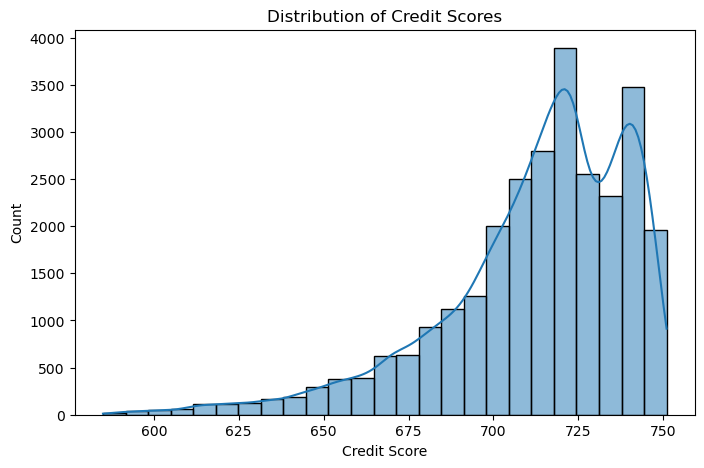

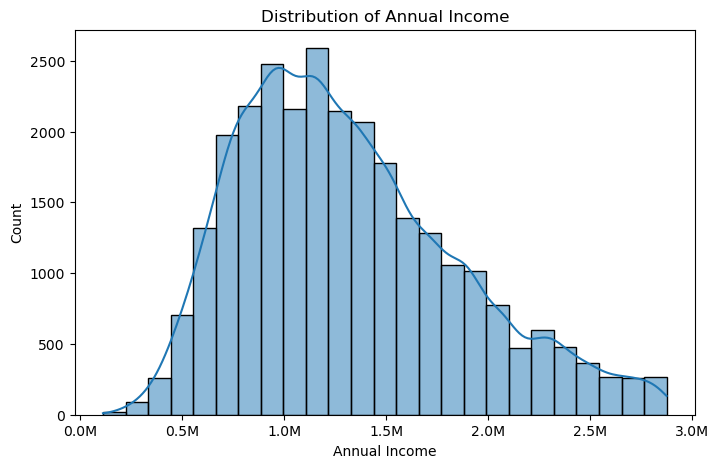

Statitics Summary of Annual Income
Mean Annual Income: 1316082.7542975591
Median Annual Income: 1228160.0
Standard Deviation of Annual Income: 540628.998885162
Minimum Annual Income: 111245.0
Maximum Annual Income: 2875080.0


In [115]:
# Histogram: Illustrating distribution of Credit Score.

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Credit Score'], bins=25, kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

# # Histogram: Illustrating distribution of Term.
# plt.figure(figsize=(8, 5))
# sns.histoplot(cleaned_data ['Term'], bins=25, kde=True)
# plt.title('Distribution of Term')
# plt.show()

# Histogram: Illustrating distribution of Annual Income.
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Annual Income'], bins=25, kde=True)
plt.title('Distribution of Annual Income')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Statitics Summary of Annual Income
print("Statitics Summary of Annual Income")
annual_income = cleaned_data['Annual Income']
mean_income = annual_income.mean()
median_income = annual_income.median()
std_income = annual_income.std()
min_income = annual_income.min()
max_income = annual_income.max()

print(f"Mean Annual Income: {mean_income}")
print(f"Median Annual Income: {median_income}")
print(f"Standard Deviation of Annual Income: {std_income}")
print(f"Minimum Annual Income: {min_income}")
print(f"Maximum Annual Income: {max_income}")

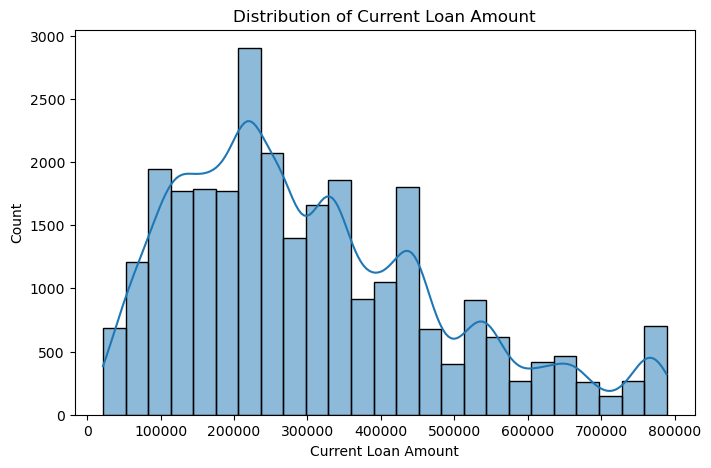

Statitics Summary of Current Loan Amount
Mean Loan Amount: 304442.30885243556
Median Loan Amount: 265782.0
Standard Deviation of Loan Amount: 178844.41941038033
Minimum Loan Amount: 21450.0
Maximum Loan Amount: 789096.0


In [116]:
# Histogram: Illustrating distribution of Current Loan Amount.
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Current Loan Amount'], bins=25, kde=True)
plt.title('Distribution of Current Loan Amount')
plt.ylabel('Count')
plt.show()

# Statitics Summary of Annual Income
print("Statitics Summary of Current Loan Amount")
loan_amount = cleaned_data['Current Loan Amount']

mean_amt = loan_amount.mean()
median_amt = loan_amount.median()
std_amt = loan_amount.std()
min_amt = loan_amount.min()
max_amt = loan_amount.max()

print(f"Mean Loan Amount: {mean_amt}")
print(f"Median Loan Amount: {median_amt}")
print(f"Standard Deviation of Loan Amount: {std_amt}")
print(f"Minimum Loan Amount: {min_amt}")
print(f"Maximum Loan Amount: {max_amt}")

In [117]:
print(len(cleaned_data))
cleaned_data = cleaned_data[cleaned_data['Credit Score']> 710]
print(len(cleaned_data))

27981
17333


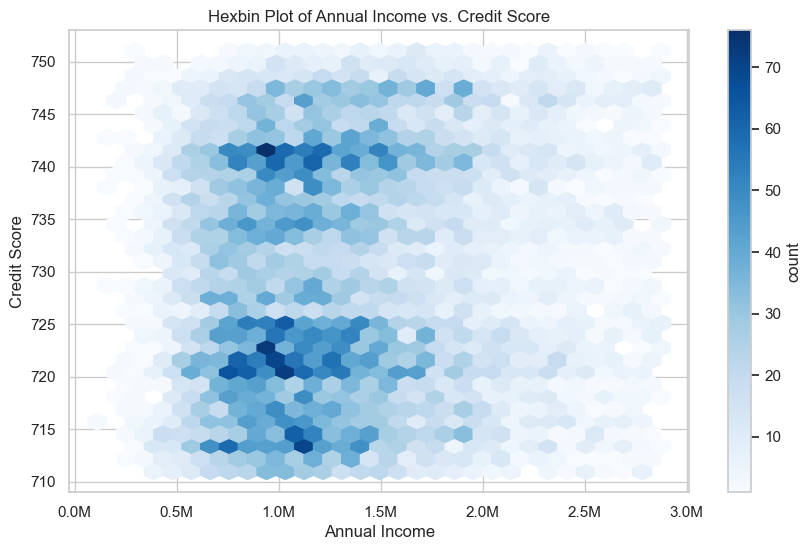

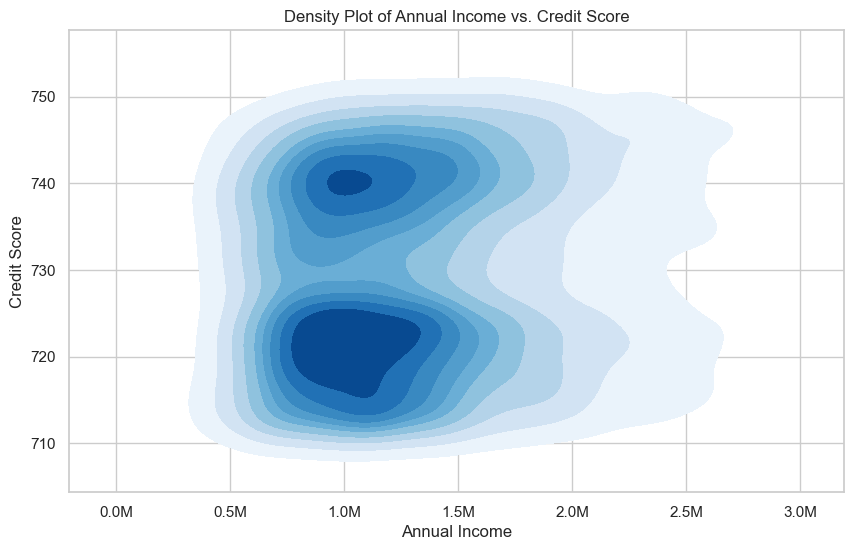

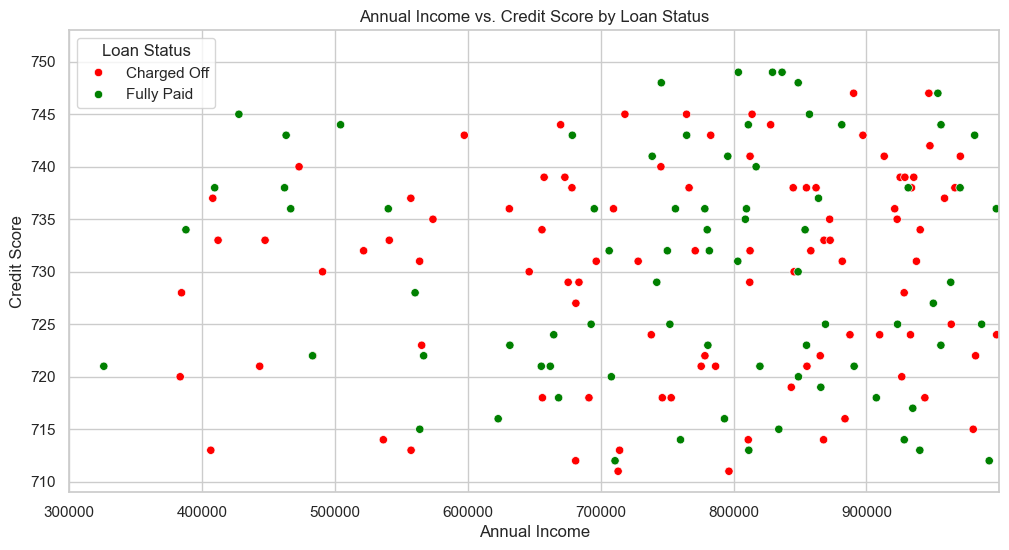

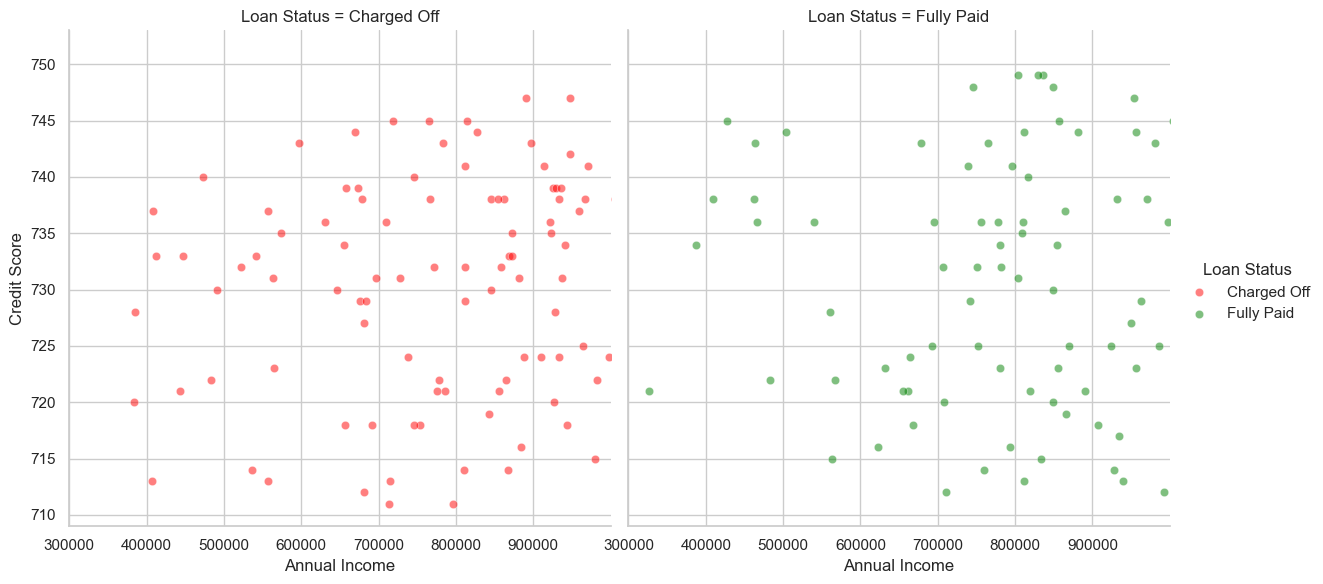

In [129]:
# Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(cleaned_data['Annual Income'], cleaned_data['Credit Score'], gridsize=30, cmap='Blues', mincnt=1)
cb = plt.colorbar(label='count')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.title('Hexbin Plot of Annual Income vs. Credit Score')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Color Gradient by Density
plt.figure(figsize=(10, 6))
sns.kdeplot(x=cleaned_data['Annual Income'], y=cleaned_data['Credit Score'], cmap='Blues', shade=True, thresh=0.05)
plt.xlabel('Annual Income') 
plt.ylabel('Credit Score')
plt.title('Density Plot of Annual Income vs. Credit Score')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Scatter Plot with Different Colors for Loan Status
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
fully_paid_data = cleaned_data[cleaned_data['Loan Status'] == 'Fully Paid'].sample(n=250, random_state=1)
random_data = pd.concat([charged_off_data, fully_paid_data])


# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Loan Status', data=random_data, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.title('Annual Income vs. Credit Score by Loan Status')
plt.legend(title='Loan Status')
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
plt.show()

# Facet Grid with Different Colors
g = sns.FacetGrid(random_data, col="Loan Status", hue="Loan Status", height=6, aspect=1, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
g.map_dataframe(sns.scatterplot, x="Annual Income", y="Credit Score", alpha=0.5)
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
g.add_legend()
plt.show()

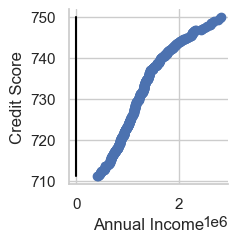

In [123]:
# Q-Q Plot 
sns.set(style="whitegrid")
kws = {"line_kws": {"color": "red", "linestyle": "--"},"identity": True}
 # Customizing the line appearance"identity": True 
 # Display the identity line }
pplot(random_data, x="Annual Income", y="Credit Score", kind='qq', display_kws=kws)
plt.show() 



In [126]:
# fig, ax = plt.subplots(figsize=(8, 6))

# # Create Q-Q plot
# stats.probplot(random_data['Annual Income'], dist="norm", plot=ax)

# # Set plot labels and title
# ax.set_title('Q-Q Plot of Annual Income against Normal Distribution')
# ax.set_xlabel('Theoretical Quantiles')
# ax.set_ylabel('Credit Score')

In [ ]:
# Correlation analysis between Annual Income vs Crdit Score
correlation_all = random_data[['Annual Income', 'Credit Score']].corr().iloc[0, 1]
print(f"Correlation (all data): {correlation_all}")

Correlation (all data): 0.07203139070015245


In [ ]:
# Statistica Test Annual Income vs Credit Score
t_statistic, p_value = ttest_ind(charged_off_data['Annual Income'], fully_paid_data['Annual Income'])
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -0.9290053177648983
P-value: 0.35333639791891513


ZeroDivisionError: float division by zero

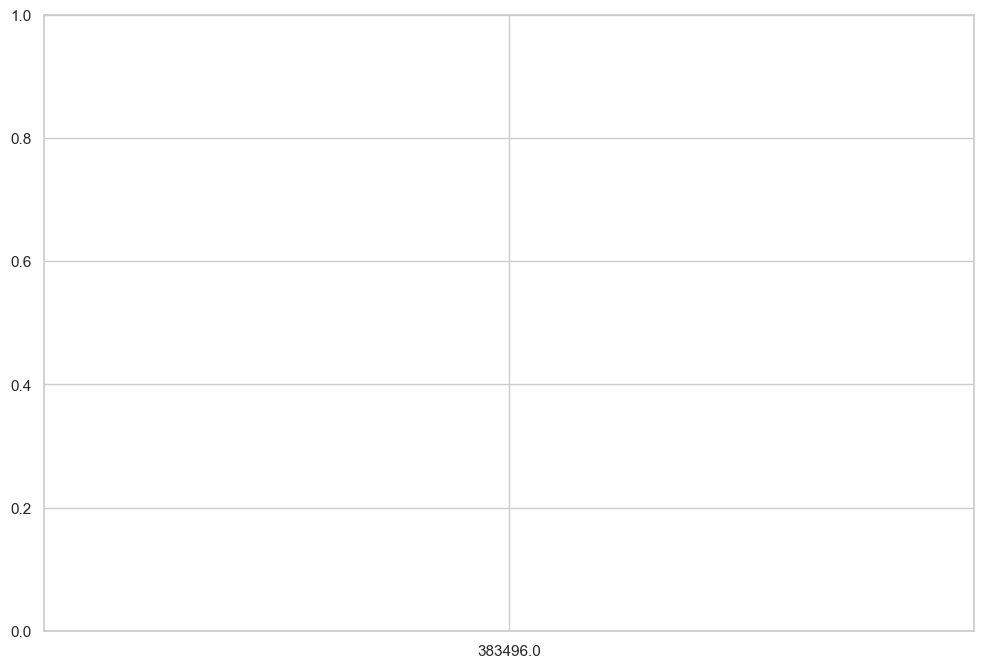

In [153]:
# Create bins for Annual Income and Credit Score
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
charged_palette=['red']
# df['Income Bin'] = pd.cut(df['Annual Income'], bins=10)
# df['Credit Score Bin'] = pd.cut(df['Credit Score'], bins=10)

# Interaction Plot using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(x='Annual Income', y='Credit Score', hue='Loan Status', data=charged_off_data, palette=charged_palette, dodge=True, markers='o', linestyles='-')
plt.title('Interaction Between Annual Income and Credit Score on Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()

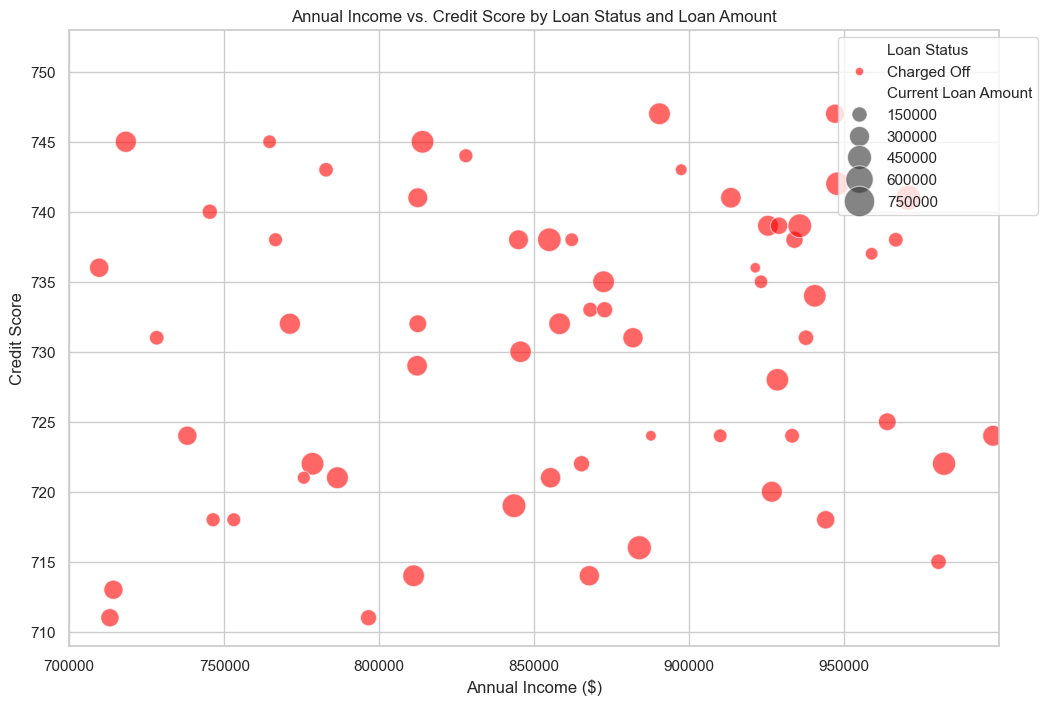

In [148]:

# Create bins for Annual Income and Credit Score
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
charged_palette=['red']

# Plotting Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Loan Status', size='Current Loan Amount',
                sizes=(50, 500), alpha=0.6, data=charged_off_data, palette=charged_palette)
plt.xlabel('Annual Income ($)')
plt.ylabel('Credit Score')
plt.title('Annual Income vs. Credit Score by Loan Status and Loan Amount')
plt.xlim([700000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(700000, 1000000, 50000)) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

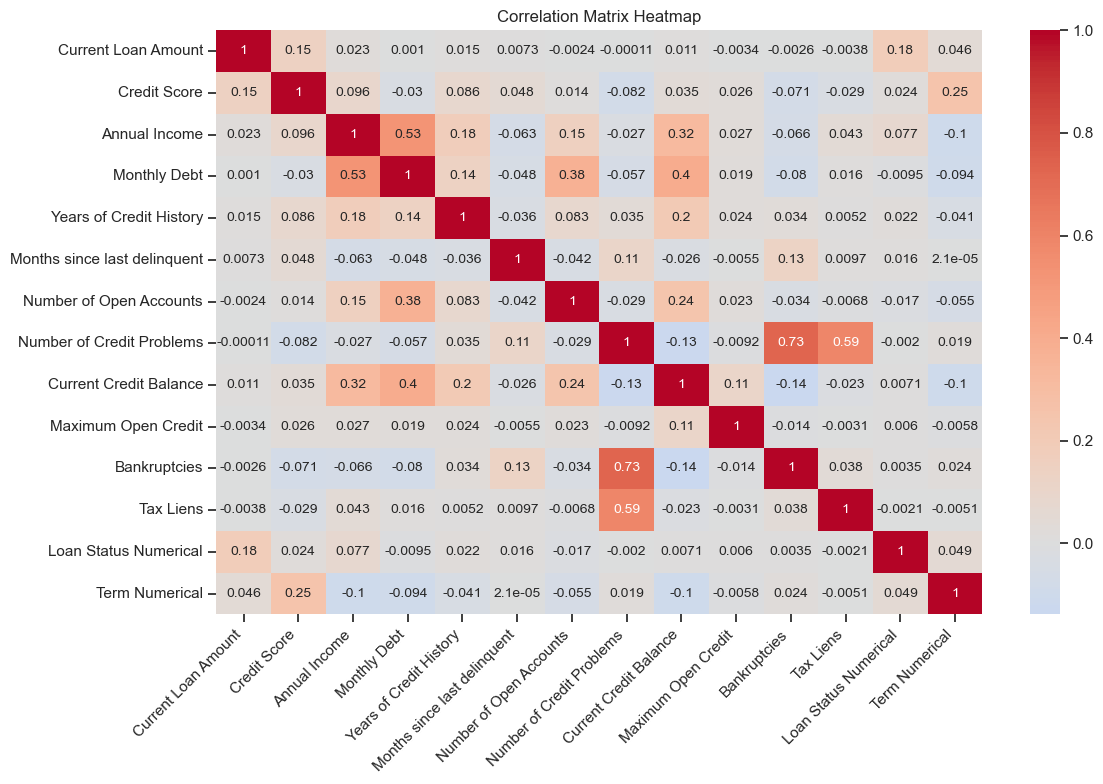

In [ ]:
# Heatmap
heat_df = cleaned_data[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',	'Years of Credit History',	'Months since last delinquent',	'Number of Open Accounts',	'Number of Credit Problems', 'Current Credit Balance',	'Maximum Open Credit',	'Bankruptcies',	'Tax Liens', 'Loan Status Numerical', 'Term Numerical']]
my_df = heat_df.corr(method='pearson')
#print(my_df)
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(my_df, annot=True, cmap='coolwarm', center=0, annot_kws={"size":10} ) 
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


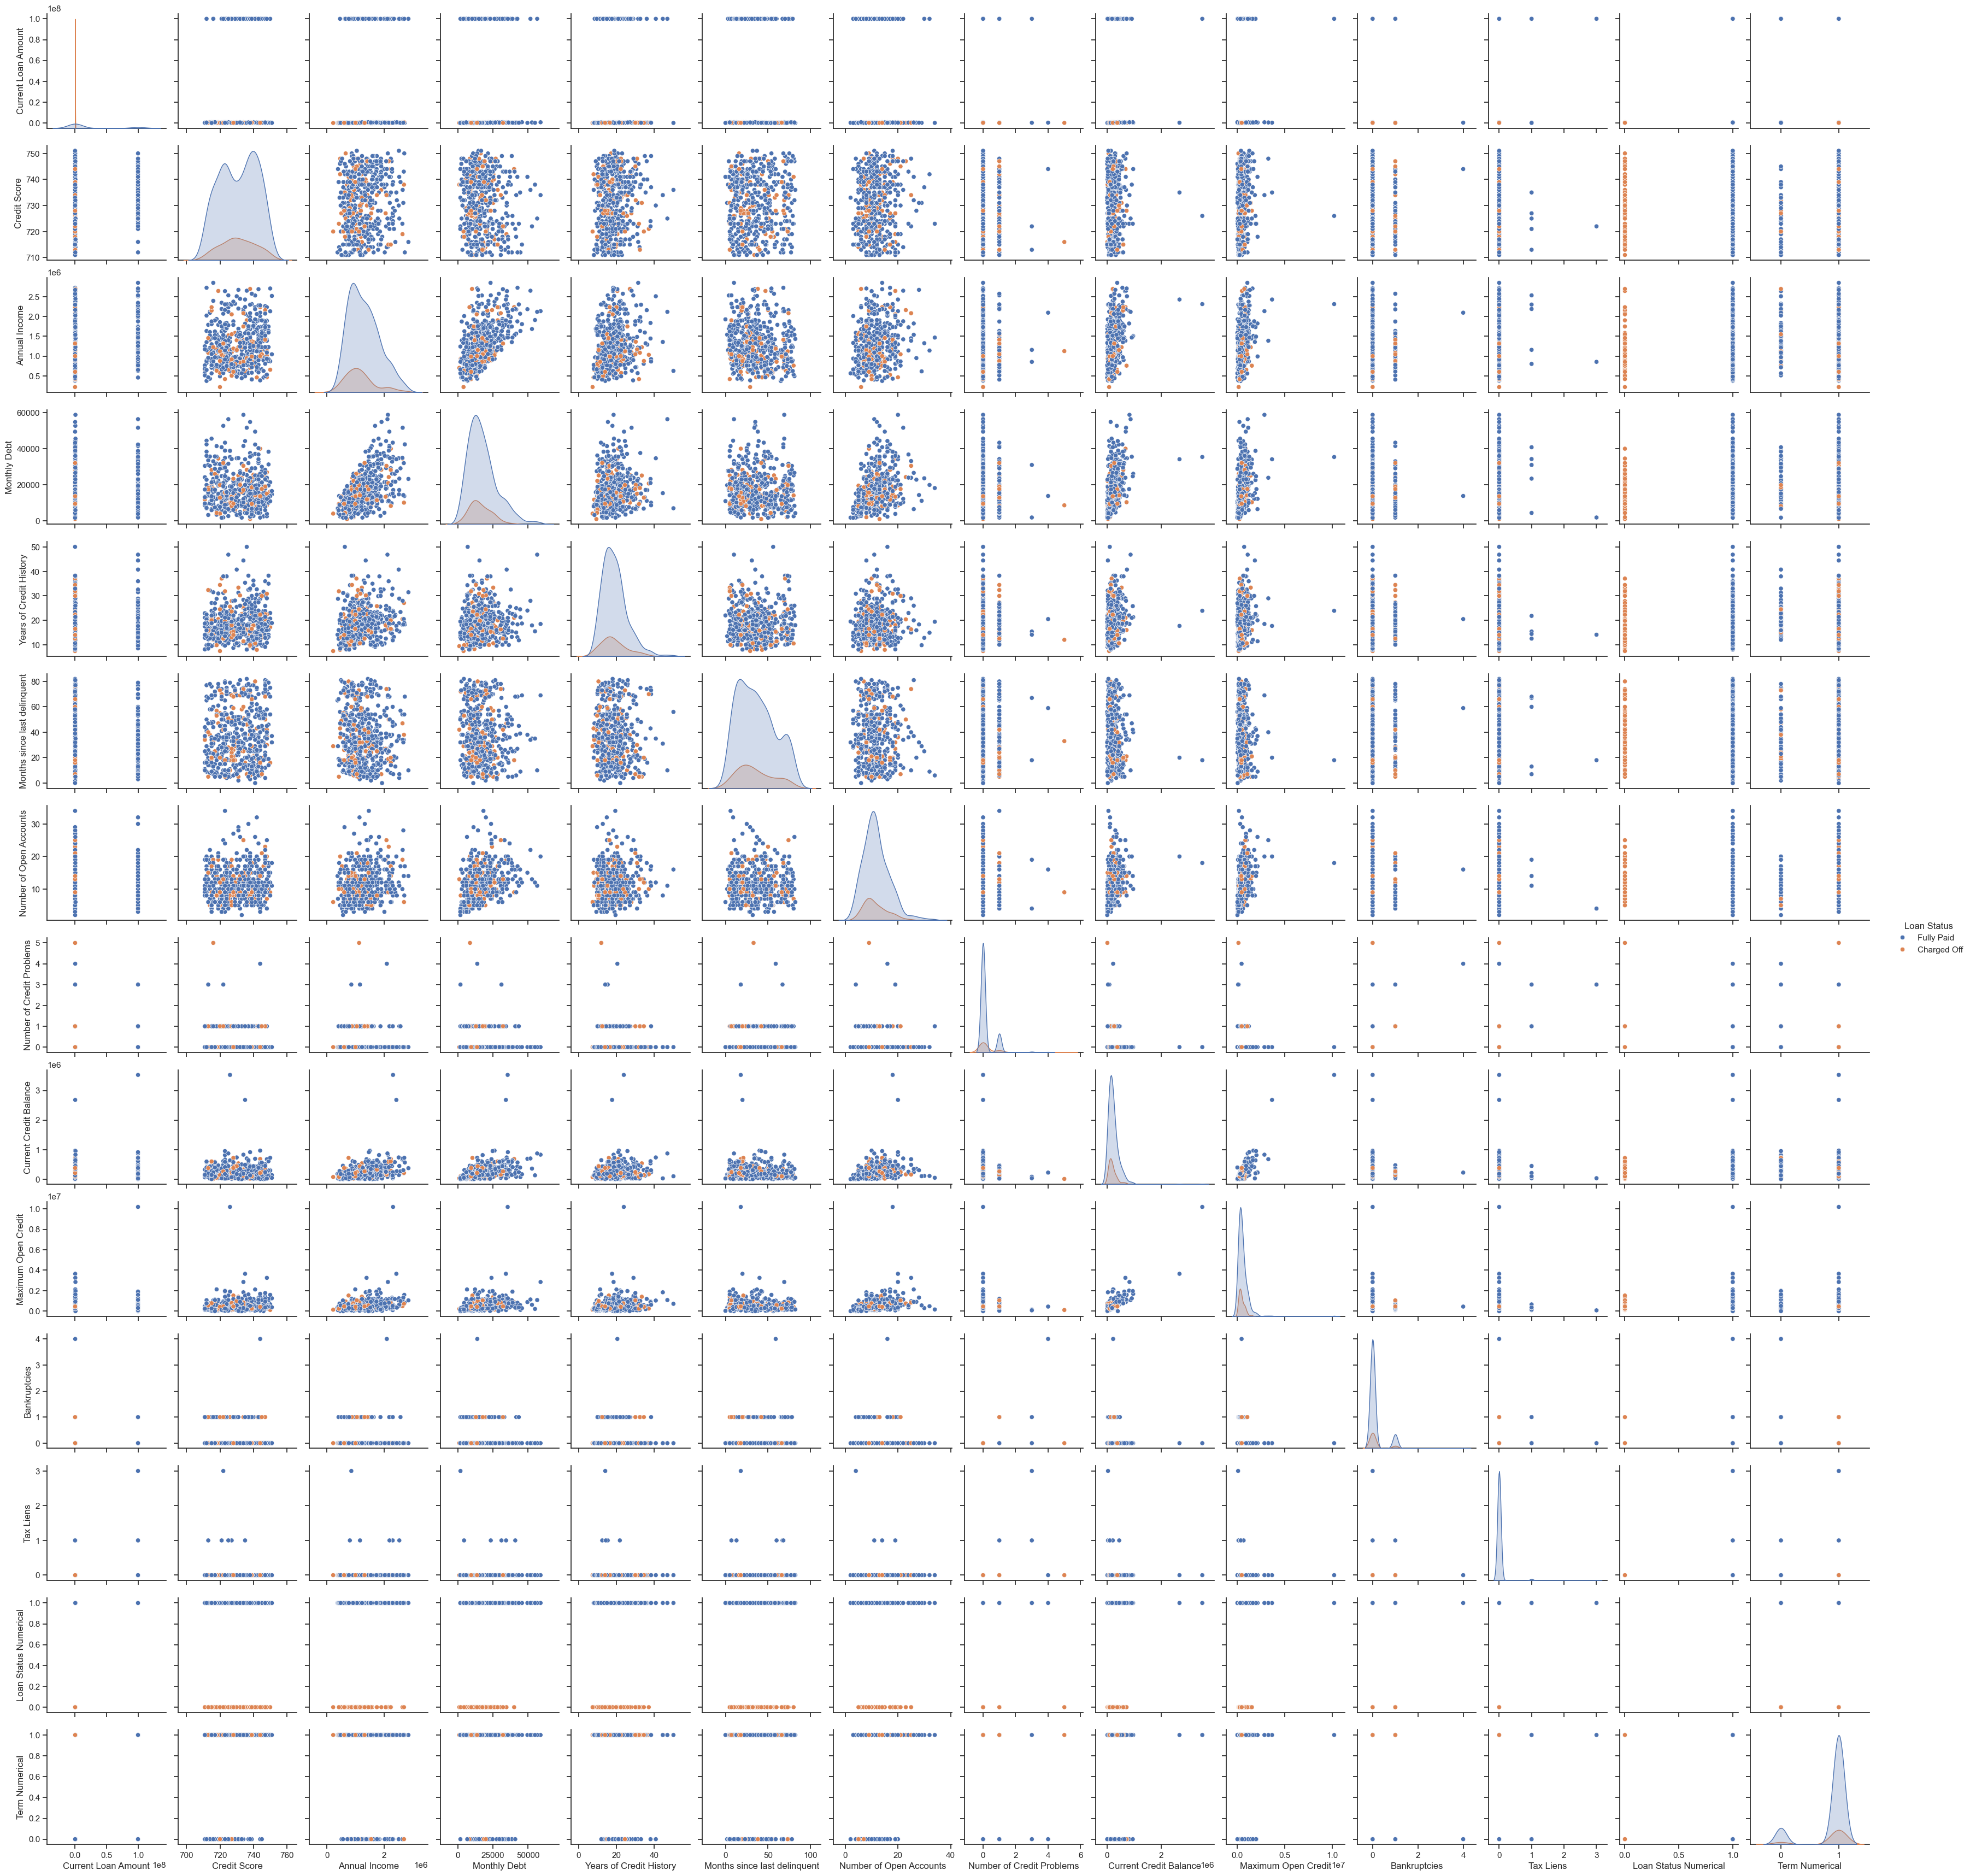

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(cleaned_data[:500], hue="Loan Status")